### Overall Objective:
To categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then we need to suggest the countries which the CEO needs to focus on the most.

### Section 1: Data Inspection and EDA

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 12.5+ KB


There seem to have no missing values in any of the columns, all of them have 167 row items. We have Country columns as string (object) type rest all are numeric.

In [4]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


- We can observe form above summary statistics that variable income and gdpp see a sudden spike in the values towards 75th percentile. However, rest all the other variables see a gradual increase in their values. This could mean that there are a group of very high income countries (having high gdp) sitting in the data. Potentially we could have other group of countries with low and medium level of income. Some visualizations below migh give us more insight and intuition about the data in hand.
- import, export and health are percentage calculations derived from gdpp variable as described in the data definition file. We would have to bring them back to original values before proceeding with our analysis.

Let us convert the values to original and look at the continuous variables in visualization.

Converting the import, export and health from percentage to a numberic. Since all these three variabels are Given as %age of the GDP per capita
We can reverse calculate the actual value of each of three variabels using below formula:
-  original_val = (value(in%) * gdpp) / 100

In [5]:
# Exports

df['exports'] = df.apply(lambda x: (df.exports*df.gdpp)/100)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
# Imports

df['imports'] = df.apply(lambda x: (df.imports*df.gdpp)/100)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,7.58,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,6.55,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,4.17,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,2.85,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,6.03,7185.800,19100,1.44,76.8,2.13,12200


In [7]:
# Health

df['health'] = df.apply(lambda x: (df.health*df.gdpp)/100)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


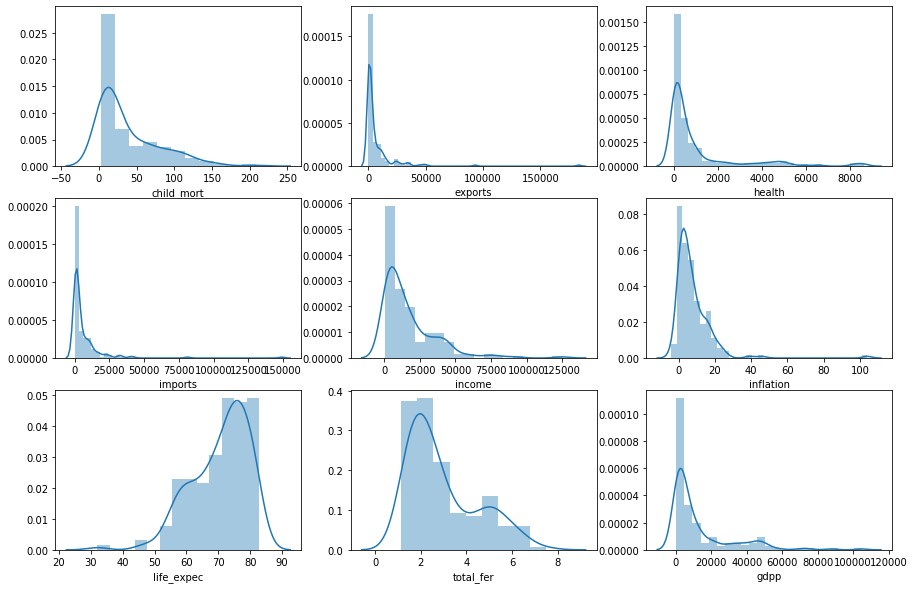

In [9]:
plt.figure(figsize = (15,10))
features = df.columns[1:]
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(df[i[1]])

- First up we can notice that not all variables are normally distributed we can observe that almost all variabels distribution is skewed.
- We can observe that the child mortality rate is in the range of 0  to 50 for most of the countries but there are still a lot of countries which have the values much higher that 50 reaching upto ~250.
- Looking at the plot above we get an intuition that a group of countries which are doing well have higher life expectancy, inflation, income, imports, exports and gpd per capita.
- while closely inscpecting the humps in the middle of graphs of income, life expectancy, gdp and inflation we can expect a secondary group of countries which are neither low performing nor high performing in terms of their socio-economic conditions. So we are expecting broadly 3 categories of countries.

Lets look at the outliers in all these variabels.

### Section 2: Outlier Treatment

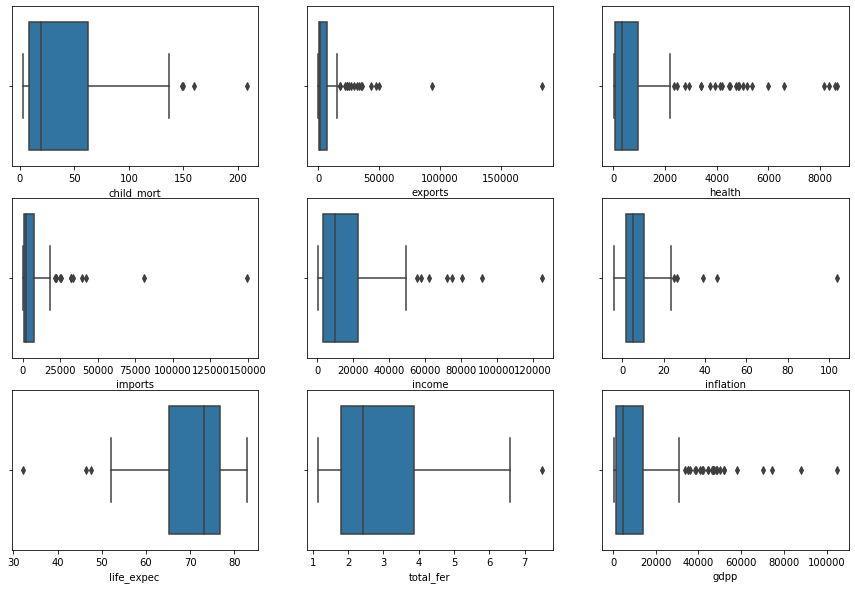

In [10]:
plt.figure(figsize = (15,10))
features = df.columns[1:]
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(df[i[1]])

- First up we observer all variables have presence of outliers and point us towards the huntch we had made above that maybe a group of countries are present in our data which have high socio-economic condition than the rest.
- We can treat outliers present in our data before we move ahead with the analysis
    - We might use capping method for outlier treatment. However, we owuld not like to cap the lower end of data points present in variabels like life expectancy because we might loose our target countries which are performing bad and are in need of the aid.

In [11]:
#print(df.describe())
for i in features:
    q4 = df[i].quantile(0.99)
    df[i][df[i]>=q4] = q4
#print(df.describe())

### Section 3.1: K-Means Clustering

In [12]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [13]:
hopkins(df.drop('country',axis = 1))

0.9377001257042448

We observe that the hopkins value is about 91 which is very significant because this informs us that the data we have is suitable for clustering analysis. Now perhaps we can move ahead and perform scaling (as different variales have different scales, which will drastically effect our results and interpretation of the results) the variables so that we have much better data on which we can perform our analysis. 

In [14]:
# scaling
from sklearn.preprocessing import StandardScaler

df1 = df.drop ('country', axis = 1)
scaler = StandardScaler()
df1 = scaler.fit_transform(df1)

In [15]:
df1 = pd.DataFrame(df1)
df1.columns = df.columns[:-1]
df1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer
0,1.344006,-0.569622,-0.566958,-0.598741,-0.851668,0.265002,-1.619705,1.926396,-0.702259
1,-0.547497,-0.473858,-0.440393,-0.413584,-0.386946,-0.372075,0.648831,-0.865054,-0.498726
2,-0.272510,-0.424000,-0.486271,-0.476100,-0.221053,1.122161,0.671403,-0.034983,-0.477434
3,2.084159,-0.381249,-0.534088,-0.463973,-0.612045,1.932987,-1.179541,2.153997,-0.530950
4,-0.709406,-0.086742,-0.178410,0.139728,0.125254,-0.764618,0.705262,-0.543736,-0.032042


Now that we have scaled the variables we are ready to perform next step of identification of value of 'k'.
- Silhouette Score
- Elbow Curve

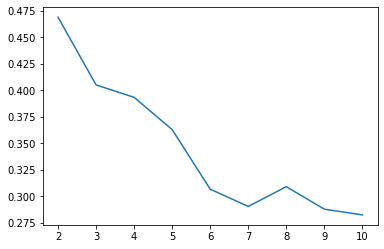

In [16]:
from sklearn.metrics import silhouette_score

ss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df1, kmeans.labels_)])

plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])

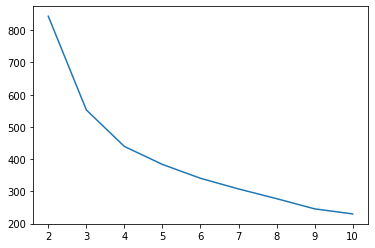

In [17]:
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ssd.append([k, kmean.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])

We can observer from above two plots that we have the first bend at value 3, meaning that possibolity of taking k=3.
This suits our understanding of the data, i.e. possibilty of 3 clusters of countries with High socio-economic status, medium and low socio-economic status. Hence, it would be safe for us to go ahead and take k=3 to prepare 3 clusters.

In [18]:
# Providing K=3 to KMeans method

kmean = KMeans(n_clusters = 3, random_state = 101)
kmean.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=101, tol=0.0001, verbose=0)

In [19]:
label = pd.DataFrame(kmean.labels_, columns = ['label'])

In [20]:
df.kmean = df.copy()

In [21]:
# Adding labels to the original dataframe

df.kmean = pd.concat([df.kmean, label ], axis =1)

In [22]:
df.kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [23]:
# Getting count of countries in each cluster

df.kmean.label.value_counts()

0    90
1    48
2    29
Name: label, dtype: int64

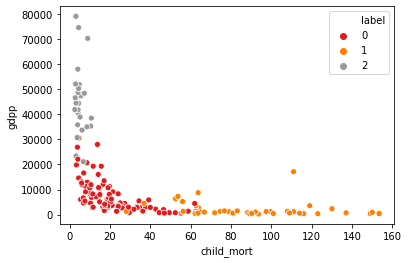

In [24]:
# Plot
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'label', data = df.kmean, palette = 'Set1')

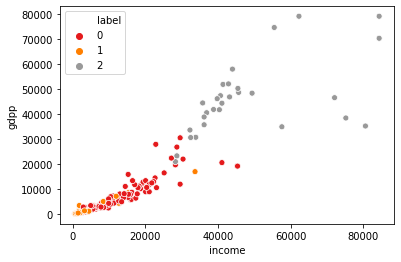

In [25]:
sns.scatterplot(x = 'income', y = 'gdpp', hue = 'label', data = df.kmean, palette = 'Set1')

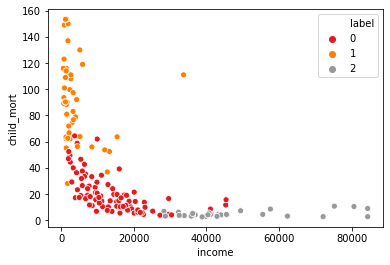

In [26]:
sns.scatterplot(x = 'income', y = 'child_mort', hue = 'label', data = df.kmean, palette = 'Set1')

We can observe that we have three clusters when we look at variables like child mortality, income and gdpp.
Now let's look at the labels created by the algorithm versus some of the features.

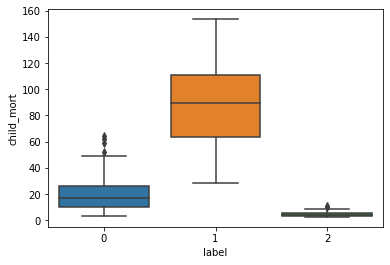

In [27]:
sns.boxplot(x='label', y='child_mort', data=df.kmean)

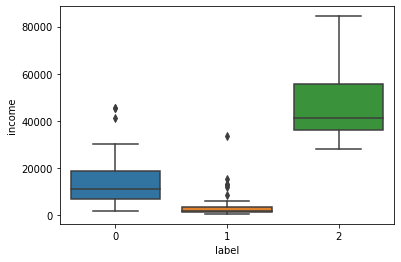

In [28]:
sns.boxplot(x='label', y='income', data=df.kmean)

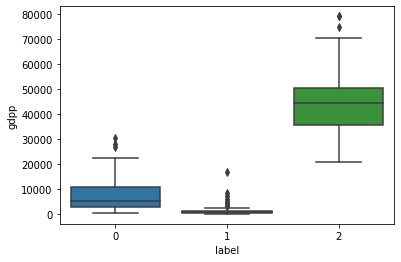

In [29]:
sns.boxplot(x='label', y='gdpp', data=df.kmean)

We can see a clear image that above plot paints in front of us.
- Countries with label = 2 as best performing
- Countries with label = 1 as worst performing which are in dire need of getting AID
- Countries with label = 0 as those which have child mortality better than the worst prerforming but worse than the best performing lot.

This story is backed by the second and third plot which tells us that countries with label = 1 have Lowest gdp per capita, Highest child mortality and lowest income of all categories.

It would be safe for us to say that the clustering activity is performed which is fits well with the intuition we have built while performing EDA.

The next step would be to perform clustering using Hierarchical Clustering algorithm and compare the performance of both algorithms on same data.

### Section 3.2: Hierarchical Clustering

In [30]:
# Taking a look again at our Scaled data
df1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer
0,1.344006,-0.569622,-0.566958,-0.598741,-0.851668,0.265002,-1.619705,1.926396,-0.702259
1,-0.547497,-0.473858,-0.440393,-0.413584,-0.386946,-0.372075,0.648831,-0.865054,-0.498726
2,-0.272510,-0.424000,-0.486271,-0.476100,-0.221053,1.122161,0.671403,-0.034983,-0.477434
3,2.084159,-0.381249,-0.534088,-0.463973,-0.612045,1.932987,-1.179541,2.153997,-0.530950
4,-0.709406,-0.086742,-0.178410,0.139728,0.125254,-0.764618,0.705262,-0.543736,-0.032042


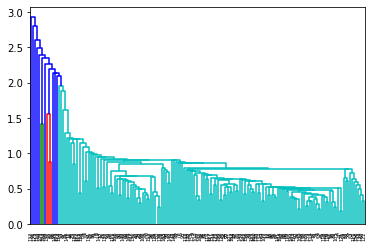

In [31]:
# single linkage
mergings = linkage(df1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

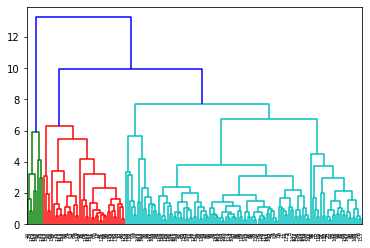

In [32]:
# complete linkage
mergings = linkage(df1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

We can see that out of both linkage methods, we have better segregated clusters using complete linkage, which is expected and we would be able to make a cut the tree to get less branches which is intuitive in this case. It might be significant to make the cut at values where we get about three clusters, i.e. between 8-10.

In [33]:
# Considering 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [34]:
# assign cluster labels to each country in the dataframe
df.kmean['cluster_labels'] = cluster_labels
df.kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0,1


Now that we have assigned both label (using Kmeans) and cluster_labels (using Hierarchical) to each country in our dataframe. It would be nice to compare the labels assigned using both methods.
First, looking at the cluster_labels. 

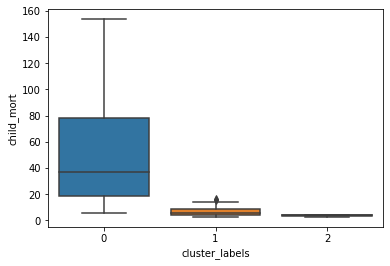

In [35]:
sns.boxplot(x='cluster_labels', y='child_mort', data=df.kmean)

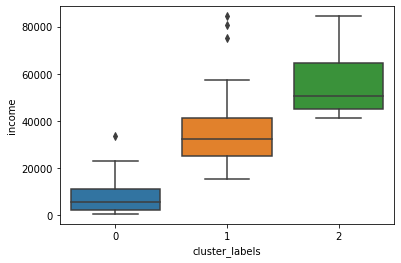

In [36]:
sns.boxplot(x='cluster_labels', y='income', data=df.kmean)

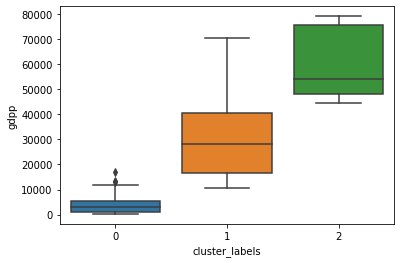

In [37]:
sns.boxplot(x='cluster_labels', y='gdpp', data=df.kmean)

We can observe that the three clusters created using Hierarchical method have following meaning of labels.
- Cluster_labels = 2 for Best performing countries
- Cluster_labels = 0 for Worst performing countries which are in dire need of the AID
- Cluster_labels = 1 for countries which are performing somewhere in between the best and the worst perfroming countries

### Identifying top 5 worst performing countries

In [38]:
df.kmean[df.kmean['label'] == 1].sort_values(by = ['child_mort', 'income', 'gdpp'], ascending = [False, True, True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label,cluster_labels
132,Sierra Leone,153.4,67.032,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,1,0
66,Haiti,153.4,101.286,45.7442,428.314,1500.0,5.45,32.1,3.3300,662.0,1,0
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.39,56.5,6.5636,897.0,1,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,1,0
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.37,59.5,6.5500,708.0,1,0


#### Based on this exercise of clustering, we can give a recommendation of top 5 countries which should be helped on priority.
- Sierra Leone
- Haiti
- Chad
- Central African Republic
- Mali